In [19]:
import numpy as np
import matplotlib.pyplot as plt          
#from scipy.linalg import lapack as lp
from scipy.linalg import eigh        

def usum(v1,v2,n):
    if(len(v1)<n or len(v2)<n):
        print('error usum: index out of range')
        return 0
    else:
        s=0
        for i in range(n):
            s=s+v1[i]*v2[i]
        return s
        
        
L=33                                           #numero di siti totali
dn=0                                           #nup-ndown
N=L + dn                                       #numero di orbitali d
A=L                                            #numero di siti con interazione V>0
V0=1
V=[0]*L
T=0
dt=10**(-2)                                    #step 
ITERMAX=5*10**4                                #numero massimo di iterazioni
ERRORMAX=10**(-3)                              #massimo errore ammesso sui parametri meanfield
verror=[]


for i in range(L):
    if(i<(L-A)/2 or i>=(L+A)/2):
        V[i]=-2
    else:
        V[i]=V0

print("V0 =",V0," T =",T)

n = np.random.rand(2*L)
delta = np.random.rand(L)+np.random.rand(L)*1j

n_n=np.zeros(2*L)
n_delta=np.zeros(L)+np.zeros(L)*1j

E=np.zeros((2*L,2*L),dtype=np.complex_)


for niter in range(ITERMAX):

    for i in range(L):
        E[i,i]=V[i]*n[i+L]                        #diagonale parte sup
        E[i+L,i+L]=-V[i]*n[i]                       #diagonale parte inf
        E[i,i+L]=V[i]*np.conj(delta[i])           #blocchi off-diagonali
        E[i+L,i]=V[i]*delta[i]

    for i in range(L-1):                           #incroci consecutivi
        E[i,i+1]=-T    
        E[i+1,i]=-T    
        E[i+L,i+L+1]=T                        
        E[i+L+1,i+L]=T  

    E[0,L-1]=-T
    E[L-1,0]=-T
    E[2*L-1,L]=T
    E[L,2*L-1]=T

    Eval,Evec = eigh(E)

    U=np.conj(np.transpose(Evec))

    for i in range(L):
        n_delta[i]= usum(U[:,i+L],np.conj(U[:,i]),N)
        n_n[i]    = usum(U[:,i],np.conj(U[:,i]),N)
        n_n[i+L]  = 1- usum(U[:,i+L],np.conj(U[:,i+L]),N)

    #VECTOR OF ERRORS
    num=sum(np.abs(n_delta-delta))+sum(np.abs(n_n-n))
    den=sum(np.abs(n_delta))+sum(np.abs(n_n))
    verror.append(num/den)

    if(verror[niter]<ERRORMAX):
        n=n_n
        delta=n_delta
        print("method successfully converged after", niter, "iterations")
        print("error:",verror[niter])
        break

    else:
        delta=delta*(1-dt)+n_delta*dt
        n=n*(1-dt)+n_n*dt  

    if(niter==ITERMAX-1):
        print("number of iterations exceeded", ITERMAX)
        print("min error achieved:",min(verror))
        print("last error value:",verror[niter])

V0 = 1  T = 0


<ipython-input-19-579d4b05dc34>:72: ComplexWarning: Casting complex values to real discards the imaginary part
  n_n[i]    = usum(U[:,i],np.conj(U[:,i]),N)
<ipython-input-19-579d4b05dc34>:73: ComplexWarning: Casting complex values to real discards the imaginary part
  n_n[i+L]  = 1- usum(U[:,i+L],np.conj(U[:,i+L]),N)


method successfully converged after 716 iterations
error: 0.0009965251867342768


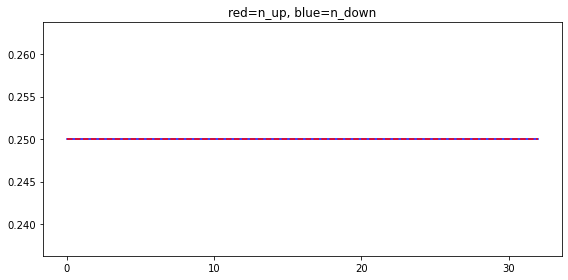

In [20]:
#PLOT N
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
plt.xticks(np.arange(0, L, step=10))  

x = np.arange(L)
n_up=np.round(n[:L],2)
n_down=np.round(n[L:],2)

plt.title("red=n_up, blue=n_down")
plt.plot(x, n_down, 'b')
plt.plot(x, n_up, "r--")

plt.show()

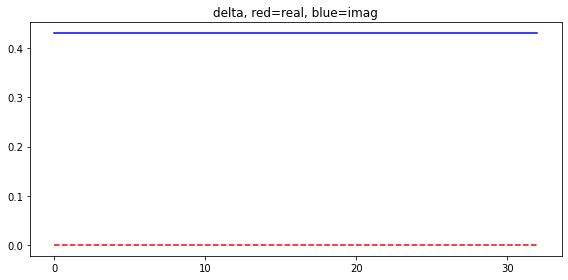

In [21]:
#PLOT DELTA
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
plt.xticks(np.arange(0, L, step=10))  

x = np.arange(L)

plt.title("delta, red=real, blue=imag")
plt.plot(x, np.imag(np.round(delta,2)), color="blue")
plt.plot(x, np.real(np.round(delta,2)), "r--")


plt.show()

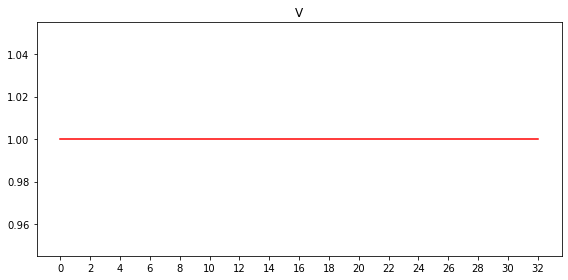

In [22]:
#PLOT POTENZIALE
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
plt.xticks(np.arange(0, L+2, step=2))  

x = np.arange(L)

plt.title("V")
plt.plot(x, V, color="red")

plt.show()

In [23]:
ener1=sum(Eval[:N])#+usum(V,n[:L],L)
ener2=sum(V)#+usum(V,n[:L],L)

In [24]:
print(ener1)
print(ener2)

-16.489862866396308
33
